In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!cat madx/sis18.lat

! Element definitions:
! ------------------- horizontal quadrupole ----------------------------
QS1F: QUADRUPOLE, L=1.04, K1=0.282632;
QS2D: QUADRUPOLE, L=1.04, K1=-0.492;
QS3T: QUADRUPOLE, L = 0.4804, K1 = 0.656;
!---------------------  DRIFT SPACES DEFINITION  ---------------------
DR1: DRIFT, L=0.6450000;
DR2: DRIFT, L=0.9700000;
DR3: DRIFT, L=6.8390117;
DR4: DRIFT, L=0.6000000;
DR5: DRIFT, L=0.7098000;
DR6: DRIFT, L=0.4998000;
!--------------------------  BENDING MAGNET ---------------------------
ALPHA  := 15 * 1/57.2958;
LL  := 150 * 1/57.2958;
RB: SBEND, L=2.6175, ANGLE=ALPHA;

! ---------------------------  LINE DEFINITION --------------------------
! Sections without injection devices, steeres and position monitors
CELLA: LINE=(DR1, RB, DR2, RB, DR3, QS1F, DR4, QS2D, DR5, QS3T, DR6);

FODO: LINE = (12*CELLA);


RETURN;


In [3]:
from cpymad.madx import Madx

import pysixtracklib as pyst

In [4]:
madx = Madx()
madx.options.echo = False


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.04.02  (64 bit, Linux)       +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2018.10.03               +
  + Execution date: 2019.05.06 12:02:04      +
  ++++++++++++++++++++++++++++++++++++++++++++


In [5]:
madx.call(file="madx/sis18.lat")

In [6]:
from scipy.constants import e, m_p, c

In [7]:
p0c = 6 * 1e9 * e
Etot = np.sqrt(p0c**2 + m_p**2 * c**4) / e * 1e-9 # in GeV

In [8]:
Etot

6.072919767202941

In [9]:
madx.command.beam(particle='proton', energy=str(Etot)) # energy in GeV

True

In [10]:
madx.use(sequence="FODO")

In [11]:
madx.twiss()

enter Twiss module

++++++ table: summ

            length             orbit5               alfa            gammatr 
       216.7081404                 -0      0.03859362031        5.090286657 

                q1                dq1            betxmax              dxmax 
       4.577501457       -4.130454489        15.39960299        2.438781128 

             dxrms             xcomax             xcorms                 q2 
        1.87333493                  0                  0        2.718992979 

               dq2            betymax              dymax              dyrms 
      -6.521429582         29.6324848                  0                  0 

            ycomax             ycorms             deltap            synch_1 
                 0                  0                  0                  0 

           synch_2            synch_3            synch_4            synch_5 
                 0                  0                  0                  0 

            nflips 
          

<Table 'twiss': {name, keyword, s, betx, alfx, mux, bety, alfy, muy, x, px, y, py, t, pt, dx, dpx, dy, dpy, wx, phix, dmux, wy, phiy, dmuy, ddx, ddpx, ddy, ddpy, r11, r12, r21, r22, energy, l, angle, k0l, k0sl, k1l, k1sl, k2l, k2sl, k3l, k3sl, k4l, k4sl, k5l, k5sl, k6l, k6sl, k7l, k7sl, k8l, k8sl, k9l, k9sl, k10l, k10sl, k11l, k11sl, k12l, k12sl, k13l, k13sl, k14l, k14sl, k15l, k15sl, k16l, k16sl, k17l, k17sl, k18l, k18sl, k19l, k19sl, k20l, k20sl, ksi, hkick, vkick, tilt, e1, e2, h1, h2, hgap, fint, fintx, volt, lag, freq, harmon, slot_id, assembly_id, mech_sep, v_pos, bbcharge, xma, yma, sigx, sigy, lrad, parent, comments, re11, re12, re13, re14, re15, re16, re21, re22, re23, re24, re25, re26, re31, re32, re33, re34, re35, re36, re41, re42, re43, re44, re45, re46, re51, re52, re53, re54, re55, re56, re61, re62, re63, re64, re65, re66, kmax, kmin, calib, polarity, alfa, beta11, beta12, beta13, beta21, beta22, beta23, beta31, beta32, beta33, alfa11, alfa12, alfa13, alfa21, alfa22, alfa

In [12]:
assert madx.command.select(
    flag='MAKETHIN',
    CLASS='QUADRUPOLE',
    SLICE='8',
)

assert madx.command.select(
    flag='MAKETHIN',
    class_='SBEND',
    slice_='8',
)

assert madx.command.select(
    flag='MAKETHIN',
    class_='RBEND',
    slice_='8',
)

In [13]:
madx.command.makethin(
    makedipedge=False,
    style='teapot',
    sequence='FODO',
)

makethin: style chosen : teapot
makethin: slicing sequence : fodo


True

In [14]:
twiss = madx.twiss()

enter Twiss module

++++++ table: summ

            length             orbit5               alfa            gammatr 
       216.7081404                 -0      0.03859362031        5.090286657 

                q1                dq1            betxmax              dxmax 
       4.577501457       -4.130454489        15.39960299        2.438781128 

             dxrms             xcomax             xcorms                 q2 
        1.87333493                  0                  0        2.718992979 

               dq2            betymax              dymax              dyrms 
      -6.521429582         29.6324848                  0                  0 

            ycomax             ycorms             deltap            synch_1 
                 0                  0                  0                  0 

           synch_2            synch_3            synch_4            synch_5 
                 0                  0                  0                  0 

            nflips 
          

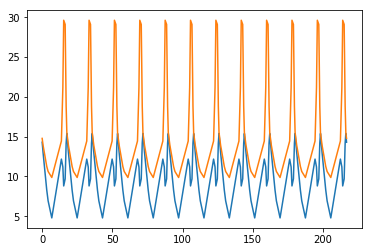

In [15]:
plt.plot(twiss['s'], twiss['betx'])
plt.plot(twiss['s'], twiss['bety'])

In [16]:
sis18 = madx.sequence.FODO

In [17]:
elements = pyst.Elements.from_mad(sis18)

In [18]:
nturns = 1024
elements = pyst.Elements.from_mad(sis18)
elements.BeamMonitor(num_stores=nturns);

In [19]:
npart = 10
particles = pyst.Particles.from_ref(npart, p0c=p0c)

In [20]:
particles.x += np.linspace(0, 1e-6, npart)

In [21]:
job = pyst.TrackJob(elements, particles)

In [22]:
job.track(nturns)

0

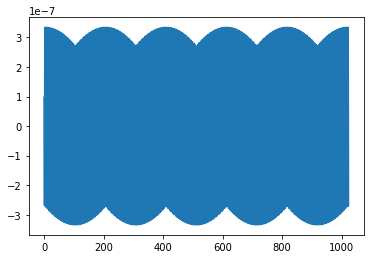

In [23]:
plt.plot(job.output.particles[0].x[1::npart])

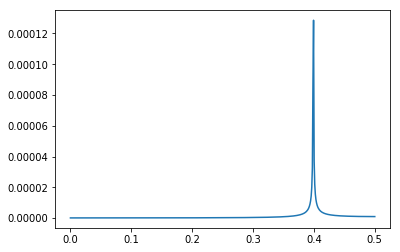

In [24]:
data = job.output.particles[0].x[1::npart]
plt.plot(
    np.fft.rfftfreq(len(data)),
    np.abs(np.fft.rfft(data))
)

In [34]:
madx.twiss();

enter Twiss module

++++++ table: summ

            length             orbit5               alfa            gammatr 
       216.7081404                 -0      0.03859362031        5.090286657 

                q1                dq1            betxmax              dxmax 
       4.577501457       -4.130454489        15.39960299        2.438781128 

             dxrms             xcomax             xcorms                 q2 
        1.87333493                  0                  0        2.718992979 

               dq2            betymax              dymax              dyrms 
      -6.521429582         29.6324848                  0                  0 

            ycomax             ycorms             deltap            synch_1 
                 0                  0                  0                  0 

           synch_2            synch_3            synch_4            synch_5 
                 0                  0                  0                  0 

            nflips 
          

# Timing Comparison

On the Dell Latitude 5290 with intel i5-8250U we benchmark:

In [26]:
pyst.TrackJob.enabled_archs()

['opencl', 'cpu']

In [27]:
npart = int(1e6)
particles = pyst.Particles.from_ref(npart, p0c=p0c)

nturns = 10
elements = pyst.Elements.from_mad(sis18)

## Single CPU timing

In [30]:
job = pyst.TrackJob(elements, particles, arch='cpu')

In [31]:
%timeit job.track(nturns)

1.78 ms ± 5.24 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [37]:
len(sis18.elements)

542

## OpenCL multi-core CPU timing

In [32]:
job = pyst.TrackJob(elements.cbuffer, particles, arch="opencl", device_id="1.0")

In [33]:
%timeit job.track(nturns)

14.5 ms ± 97.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
